# Leitura e tratamento de dados

Neste [Jupyter Notebook](http://jupyter.org/) vamos abordar a leitura e tratamento de dados técnicos e científicos empregando Python. Para tanto trataremos de algumas práticas de melhor gestão de dados e como armazenar e controlar versões para que facilmente possamos realizar a visualização de uma base de resultados. Ao fim do estudo deste *notebook* você estará apto a criar gráficos simples em 2D para uso em artigos científicos. 

Baixe este *notebook* <a href="notebooks/02-basics.ipynb" style="color: rgb(255,0,0);">aqui</a>.

## Recapitulativo do estudo precedente

No último estudo aprendemos sobre o sistema de importação em Python. Vimos que com este podemos utilizar *pacotes* que extendem a linguagem para aplicações mais avançadas e entramos em contato com alguns pacotes do grupo [SciPy](https://www.scipy.org/). Importamos alguns destes para uso e vamos continuar usando neste estudo para atividades similares:

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

Entramos em contato com o seletor de estilos de `matplotlib`. Vamos então começar este *notebook* usando esta funcionalidade para escolher a aparência básica de gráficos que vamos exportar para nosso artigo científico:

In [2]:
pyplot.style.use('bmh')

# Melhorar a resolução dos gráficos.
pyplot.rcParams['figure.dpi'] = 200

Além disso, aprendemos que `numpy` nos fornece uma estrutura de dados chamada `array` que pode ser acessada por índices e faixas de índices, o que chamamos *slicing*. Essa facilidade nos auxilia muito em atividades de matemática numérica como veremos neste estudo ao calcular a derivada de uma coluna de dados de maneira bastante simples.

Estivemos também em contato com algumas funções de `matplotlib.pyplot`, sendo a mais importante delas [pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot), que nos permite de gerar gráficos simples (mas que podem crescer em complexidade rapidamente) em 2D.

Lembrando que sempre é importante ter acesso a documentação das funções em uma linguagem de alto nível como Python então já considere uma aba de seu navegador para consultar ao menos [pyplot](https://matplotlib.org/api/pyplot_summary.html) (e eventualmente tentar explorar novas funções além das apresentadas no estudo).

## Outros pacotes a importar

O tema principal deste estudo é a *leitura e tratamento de dados*. E nada pode ser mais fácil que realizar essas atividades que com o pacote [pandas](https://pandas.pydata.org/) que compõe a família [SciPy](https://www.scipy.org/). Vamos então importá-lo da maneira usual como proposto pela *comunidade*:

In [3]:
import pandas as pd

[pandas](https://pandas.pydata.org/) provê uma interface bastante completa para leitura e tratamento de dados em formatos de tabelas/planilhas. Permite a leitura de arquivos em diversos formatos, inclusive MS Excel. No entanto, algumas boas práticas são necessárias para que possamos realizar essa leitura facilmente e de forma consistente através de múltiplas versões de um arquivo.

## Práticas para armazenamento de dados

Você deve estar se perguntando o que quero dizer com o título acima, afinal, não basta apenas manter cópias de versões e colunas com nomes significativos? Na realidade não, e são exatamente alguns destes pontos que vamos tratar aqui.

Existe uma transição (e eventualmente uma dificuldade inicial) entre o hábito de realizar o tratamento e arquivamento de dados com o auxílio de planilhas eletrônicas (MS Excel, OpenOffice, etc) e o domínio das técnicas equivalentes em [pandas](https://pandas.pydata.org/). Tentaremos facilitar essa transição através deste estudo.

### Problemas com os métodos básicos/tradicionais

O trabalho com planilhas eletrônicas divide-se em dois grandes campos: usuários básicos que aplicam apenas fórmulas em células e propagam essas fórmulas através de colunas e aqueles mais avançados que utilizam macros para a manipulação dos dados. As principais críticas a esses paradigmas são:

- As funções disponíveis em uma planilha podem não ser as mesmas em outra, indicando que não há *portabilidade*. Por exemplo, diversas funções estatísticas de MS Excel não existem ou tem outro nome em OpenOffice. Isso dificulta o compartilhamento de trabalhos.

- Um erro de seleção ou uma célula que acidentalmente (ou intencionalmente) seja editada para não ter o mesmo cálculo que o restante de uma coluna fica *escondido* na célula em questão e inexplicado (ou mesmo esquecido pelo próprio criador da planilha), sendo uma causa importante de erros de análise.

- O aprendizado das linguagens de macro compatíveis com as planilhas eletrônicas tem uma curva bastante lenta e as funcionalidades evoluem rapidamente de uma versão a outra, frequentemente tornando macros existentes obsoletas. Além disso, o suporte *online* e documentação dessas funcionalidades é bastante pobre.

- A reutilização de uma planilha é geralmente associada a sua duplicação e cópia manual de dados. Voltamos aos erros discutidos no segundo ponto acima. Para tabelas de grandes volumes esse processo é lento.

### O que pandas pode fazer para ajudar?

O uso de [pandas](https://pandas.pydata.org/) elimina praticamente todas essas dificuldades mas exige algumas práticas de organização por parte do usuário ao preparar sua planilha. [pandas](https://pandas.pydata.org/) não vai substituir a planilha eletrônica quando a aquisição de dados for manual, nem é seu objetivo. [pandas](https://pandas.pydata.org/) vai permitir que tabelas formatadas adequadamente sejam tratadas de maneira reprodutiva através de versões sem a cópia de dados e garantindo que aquelas células que tem tratamento diferenciado sejam facilmente detectáveis com a leitura do código. [pandas](https://pandas.pydata.org/) torna-se fundamental para bases de tamanhos importantes (acima de 10 Mb no caso de PC's não dedicados de engenharia).

### Como trabalhar com pandas?

As seguintes práticas são recomendadas para uma fácil gestão:

- Planilhas devem conter dados e somente dados em forma tabular. Fórmulas e toda manipulação deve ser feita com [pandas](https://pandas.pydata.org/) após a organização inicial dos dados.
- Os nomes das colunas devem ser escritos sem espaços ou símbolos especiais: qualquer coisa que não seja um caractére da língua inglesa, um número ou *underscore*, mas devem iniciar obrigatoriamente com uma letra. Usa-se o *underscore* para representar espaços. Mais tarde chamaremos essa prática de *natural naming* e veremos porque ela é importante.
- Deixe as unidades de medida para a segunda linha da planilha ou separe-as do nome da variável com um *underscore* no nome da coluna (como faremos a seguir). A segunda prática se mostra mais fácil de gerir mas cria colunas com nomes mais longos. Dessa forma os dados começam já na segunda linha da base de dados.

## Leitura de arquivos CSV/XLS(X)

No que se segue vamos estudar um pêndulo amortecido com dados *reais*!

Para isso, eu *realizei* alguns experimentos medindo a posição angular do pêndulo no tempo com diferentes taxas de aquisição. Claramente essas medidas possuem suas imprecisões e necessitamos tratar os dados para publicar nosso *artigo*. Você encontrará os dados que salvei em formato CSV (separado por vírgulas) no diretório *data* que se encontra ao mesmo nível que este *notebook*. Começamos com a leitura de um dos arquivos para o qual a taxa de aquisição de dados foi de $4\,Hz$. 

Você encontra a documentação relativa a leitura de arquivos CSV [aqui](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table).

In [4]:
data = pd.read_csv('data/02-reading-data-rate-004.csv')

Na célula acima observe que fornecemos o caminho *relativo* do arquivo a ser lido em relação ao *notebook* para a rotina `read_csv`.

### Entendendo a estrutura de dados

Podemos obter algumas características de nosso arquivo com a função [info](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html#pandas.DataFrame.info) associada ao objeto [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame)... bom, aqui cabe a explicação de alguma terminologia empregada no que chamamos programação orientada a objetos (POO) para que você entenda o que eu disse acima.

Em POO buscamos representar idéias, conceitos e entidades físicas por o que em programação chamamos *classe*. Quando você empregou a função [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) acima, ela proveu os dados do arquivo em um *objeto* do tipo [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame), que é como `pandas` chama a representação computacional (*classe*) de uma tabela.

Um *objeto* é também chamado *instância* da classe. Se você verificar a documentação de [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame), verá que a classe possui diversos *métodos associados*. Métodos são funções que retornam informações ou modificam o objeto. A função [info](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html#pandas.DataFrame.info) (e qualquer função de um objeto) é chamada com a sintaxe `nome_do_objeto.nome_da_funcao(args)`, onde `args` representa o fato que determinadas funções podem receber argumentos.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
t_sec    800 non-null float64
A_deg    800 non-null float64
dtypes: float64(2)
memory usage: 12.6 KB


Uma chamada de [info](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html#pandas.DataFrame.info) é frequentemente o primeiro passo após a leitura de um arquivo. Vamos entender um pouco o retorno desta função:

1. Na primeira linha vemos que se trata efetivamente de um DataFrame.
2. Na segunda temos o número de entradas (800 linhas) e os índices associados (como em `numpy` - e por toda parte em Python - índices tem base 0, logo conta-se de 0 a 799).
3. Em seguida vem a descrição das colunas, que são 2 no total:
    - `t_sec`, por exemplo, é o nome da primeira coluna que possui `800` valores `non-null` (completos, não há linhas com células vazias) os quais são do tipo `float64`, que é uma representação computacional de números reais, como discutiremos em outro momento.
4. Finalmente temos um sumário dos tipos das colunas e a memória ocupada pela tabela.

Uma outra função bastante útil é [describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe), a qual fornece uma descrição estatística de nossos dados. No entanto, como neste estudo falamos de uma série temporal, os valores apresentados não possuem sentido físico e deixaremos seu uso em detalhe para um exemplo futuro.

In [6]:
data.describe()

,t_sec,A_deg
count,800.000000,800.000000
mean,100.000000,0.053180
std,57.843404,8.252537
min,0.000000,-43.953435
25%,50.000000,-0.414631
50%,100.000000,0.000022
75%,150.000000,0.435266
max,200.000000,52.390743


Outra forma de identificar o tamanho de um `DataFrame` é verificando o tamanho de seu indice `index`, que é uma propriedade comum a todos os objetos desse tipo. No nosso exemplo o `index` é uma sequência de valores `0-799` mas ele pode eventualmente ser descontínuo caso linhas sejam removidas ou até mesmo ser substituído por uma série temporal com datas. Podemos ver o tamanho de um `index` com o método dedicado para averiguar o tamanho de listas e *strings* como segue:

In [7]:
len(data.index)

800

### Acessando os dados

Há duas formas básicas de acessar os dados das colunas de um [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame): usando uma `string` com o nome da coluna dentro de colchetes, o que aceita praticamente qualquer `string` válida em Python como nome de coluna e acessando os dados com a sintaxe de acesso de *propriedades* de um objeto, ou seja, através de um ponto seguido do nome da coluna. Quando você está desenvolvendo programas longos a segunda forma é mais conveniente e rápida de digitar, deixando o código mais legível. No entanto, para que a segunda forma seja possível, você deve usar a convenção de *natural naming* que falamos anteriormente, além de que o nome da coluna não deve ser idêntico ao nome de nenhum atributo ou função de [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

In [8]:
x = data['t_sec']
y = data['A_deg']

In [9]:
x = data.t_sec
y = data.A_deg

Para conhecer a lista de atributos e métodos de um objeto, em Python você pode usar a função padrão `dir`. Retire o comentário e execute o código abaixo para listar nomes não permitidos para colunas. Lembrando que nunca é uma boa ideia empregar nomes pouco descritivos e monosilábicos, então a probabilidade de nos encontrarmos com um desses itens deve ser sempre baixa.

In [10]:
# dir(data)

Vamos realizar uma primeira visualização rápida de nossos dados empregando um *snippet* (um bloco pequeno de um programa que realiza uma tarefa específica) do código do tutorial precedente.

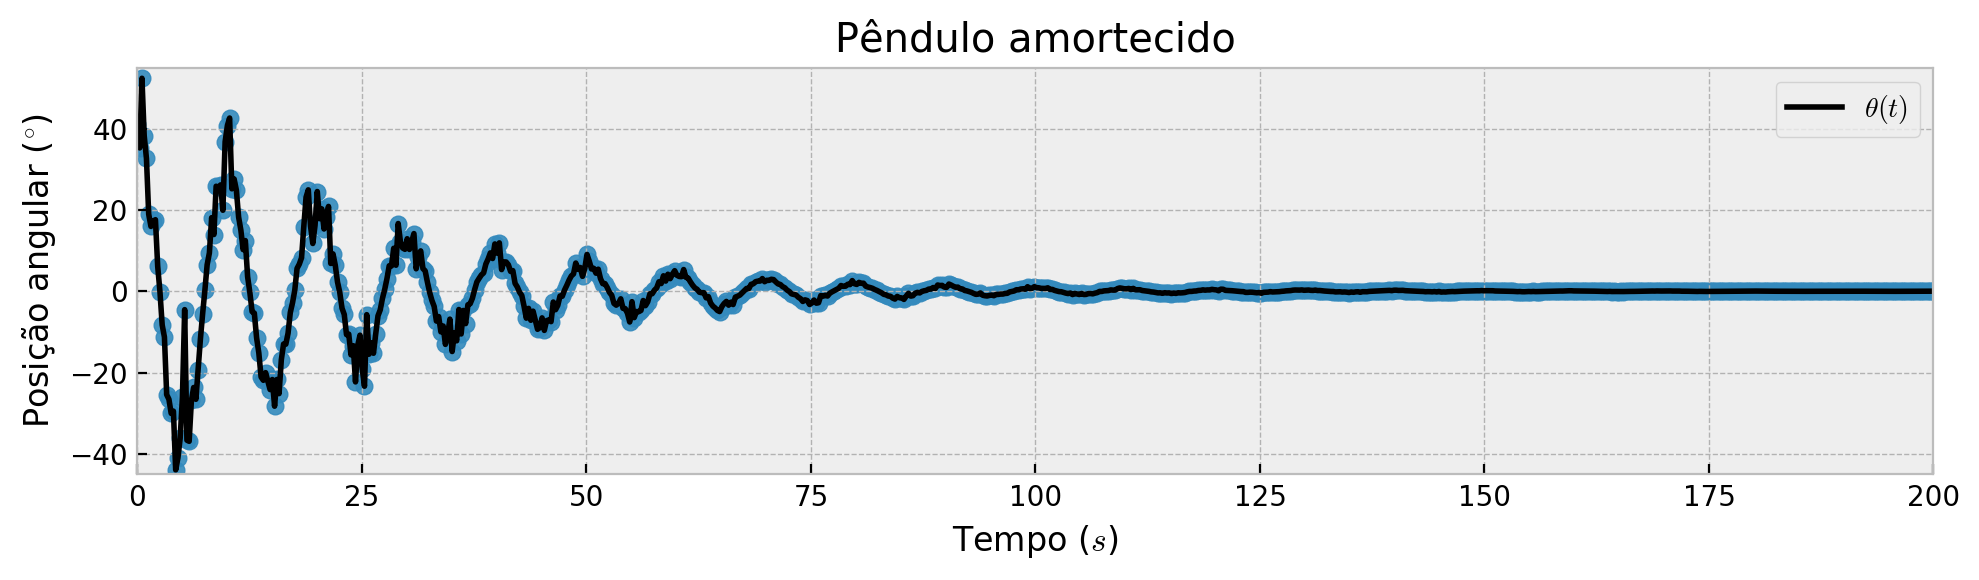

In [11]:
pyplot.close('all')
pyplot.figure(figsize=(10, 3))
pyplot.title('Pêndulo amortecido')

# Designamos algumas cores por letras: k = preto.
# Veja a documentação de pyplot.plot para mais.
pyplot.plot(x, y, 'k-', label=r'$\theta(t)$')

# Para eliminar a legenda automática: '_nolabel_'
# Aqui usamos pyplot.scatter, procure sua documentação.
pyplot.scatter(x, y, alpha=0.9, label=r'_nolabel_')

pyplot.xlabel(r'Tempo ($s$)')
pyplot.ylabel(r'Posição angular ($^{\circ}$)')
pyplot.legend(loc='best')

# Usando os limites dados por data.describe()
pyplot.xlim(0, 200)
pyplot.ylim(-45, 55)

pyplot.tight_layout()
pyplot.show()

O gráfico nos mostra que a taxa de aquisição de dados parece baixa nas regiões próximas aos zeros da função. Portanto, em nosso estudo vamos usar uma taxa de aquisição mais elevada para permitir um melhor tratamento e representação dos dados.

## Caso prático: filtro de série temporal

Para o tratamento de dados vamos empregar resultados obtidos com uma frequência de $16\,Hz$. Você é convidado a repetir o estudo com os demais arquivos que encontram-se em *data*. Fazemos a leitura do arquivo tal como realizado anteriormente e traçamos sem nenhuma configuração seu gráfico para entender a qualidade da aquisição.

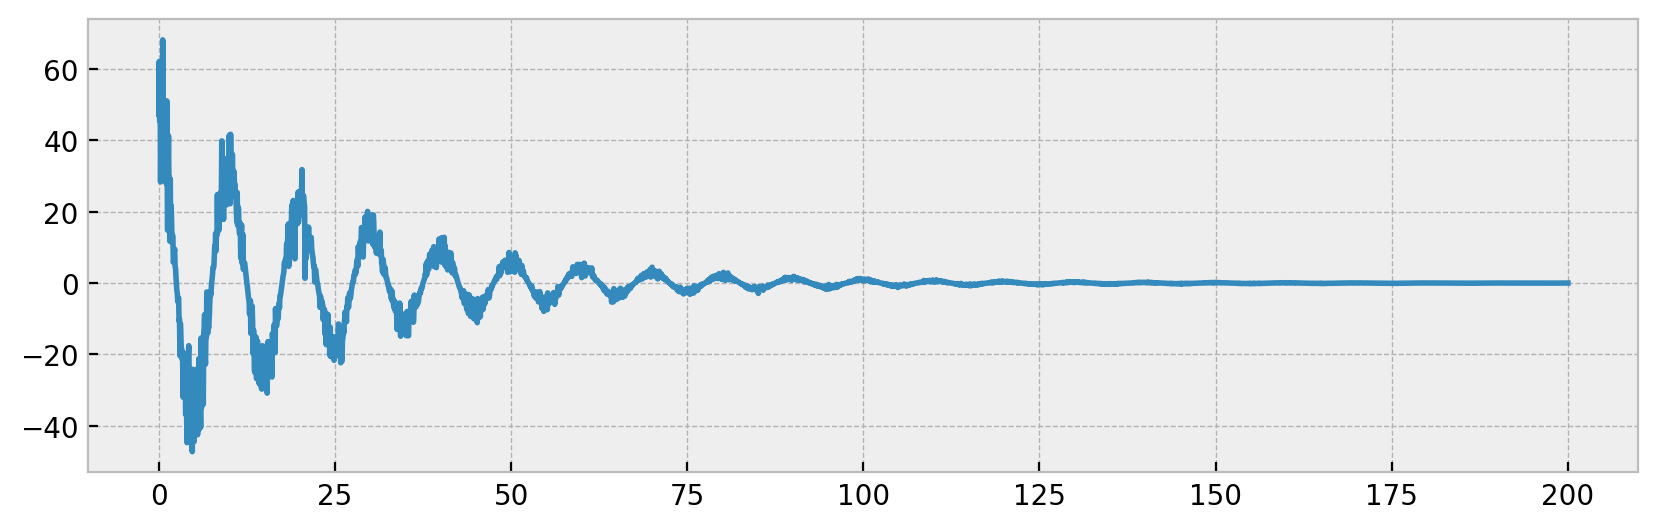

In [12]:
data = pd.read_csv('data/02-reading-data-rate-016.csv')
pyplot.figure(figsize=(10, 3))
pyplot.plot(data.t_sec, data.A_deg)

### Filtrando os dados com média móvel

Evidentemente temos algum ruído experimental advindo da *aquisição de dados*. Uma melhor forma de representação neste caso seria apresentar o gráfico original com sua média móvel para ilustrar seu comportamento médio no tempo caso não tenhamos um modelo disponível para os dados. 

*Observe que a média móvel simples em algumas situações não é adequada para tratamento numérico de dados visto que ela pode afetar a frequência natural do fenômeno e sua amplitude.*

A média móvel pode ser obtida combinando-se as funções `rolling` e `mean`. O argumento fornecido a `rolling` indica o número de pontos que vamos usar na no cálculo da média móvel.

In [13]:
data_new = data.rolling(20).mean()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 2 columns):
t_sec    3181 non-null float64
A_deg    3181 non-null float64
dtypes: float64(2)
memory usage: 50.1 KB


Como se sabe, uma média móvel remove do conjunto de dados $N-1$ elementos, em que $N$ é o número de pontos consecutivos empregados no seu cálculo. No entanto, `pandas` não faz automaticamente a eliminação desses pontos da tabela, esperando que o usuário tenha uma estratégia para substituir esses valores e manter o número de pontos na tabela constante.

Essas *células* vazias são automaticamente preenchidas com `NaN` (not a number) que é o tipo *não-numérico* padrão. Para removê-los basta *jogá-los fora* com `dropna`, como o nome da função indica. O argumento `inplace=True` faz com que a modificação deja feita diretamente sobre `data_new`. Em caso contrário teríamos de fazer:

```
data_new = data_new.dropna()
data_new = data_new.dropna(inplace=False)
```

que são equivalentes dado o padrão de `inplace` é `False`.

In [14]:
data_new.dropna(inplace=True)

Vamos agora realizar a representação dos dados filtrados com os dados originais. Quando o texto das legendas aumenta em tamanho, frequentemente é melhor organizar uma listas de todas as legendas e em seguida traçar os gráficos na ordem desejada para que ao fim as legendas correspondam aos traços corretos. Abaixo criamos a lista dos dados *originais* com sub-indice *o* de dos *novos*, *n*.

In [15]:
legends = [r'$\theta_{o}(t)$', r'$\theta_{n}(t)$']

O pêndulo leva cerca de $100\,s$ para dissipar quase a totalidade de sua energia mecânica, portanto vamos reduzir o domínio do eixo temporal para melhor visualização da região de decaimento rápido em conjunto com os dados filtrados.

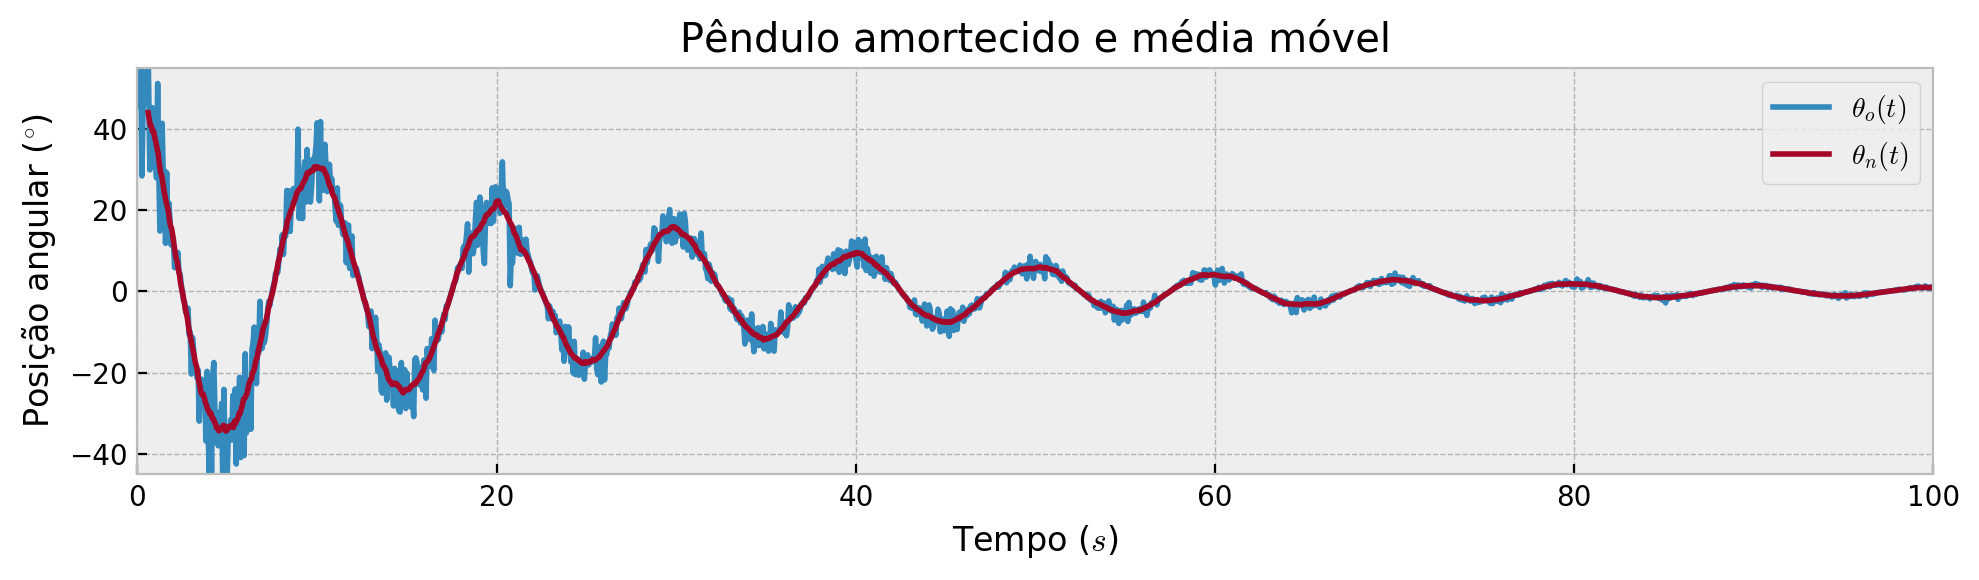

In [16]:
pyplot.close('all')
pyplot.figure(figsize=(10, 3))
pyplot.title('Pêndulo amortecido e média móvel')
pyplot.plot(data.t_sec, data.A_deg)
pyplot.plot(data_new.t_sec, data_new.A_deg)
pyplot.xlabel(r'Tempo ($s$)')
pyplot.ylabel(r'Posição angular ($^{\circ}$)')
pyplot.legend(legends, loc='best')
pyplot.xlim(0, 100)
pyplot.ylim(-45, 55)
pyplot.tight_layout()
pyplot.show()

### Calculando a derivada numérica do gráfico

A derivada representa a taxa de variação de uma função em termos de uma de suas variáveis independentes. Podemos realizar uma diferenciação numérica (e portanto aproximada) com o método das diferenças finitas usando diferenças centrais como

$$
    \frac{\mathrm{d}A}{\mathrm{d}t}\biggr\vert_{i} = \frac{A_{i+1} - A_{i-1}}{t_{i+1} - t_{i-1}}
$$

onde o índice $i$ denota a coordenada temporal para a qual desejamos calcular esta expressão. Usando a notação de *slices* (fatias) provida em Python podemos escrever a fórmula acima quase literalmente em código.

Primeiramente vamos recuperar nossos vetores de $A$ e $t$ dos objetos `DataFrame` que construimos. Para recuperar um certo número de colunas de um `DataFrame` podemos escrever

```
colunas = data[lista_de_colunas]
```

e obteremos um novo `DataFrame` apenas com as colunas listadas. Esse, por sua vez (como todo `DataFrame`) possui uma propriedade `values` que retorna literalmente uma matriz com os dados da tabela, sem os nomes das colunas. Essa matriz vai ter tantas colunas e linhas quanto a tabela original. Cada linha será composta de um valor para cada coluna existente. Para recuperar cada coluna em uma variável, podemos transpor essa matrix com sua propriedade `T` (que em `pandas` não se deve usar como nome de coluna). Assim temos

```
a, b, c = data[['a', 'b', 'c']].values.T
```

Apliquemos essa técnica a nossos dados para recuperar o eixo temporal e a amplitude em uma única linha de código, diferentemente do que fizemos anteriormente:

In [17]:
t, A = data[['t_sec', 'A_deg']].values.T
t_new, A_new = data_new[['t_sec', 'A_deg']].values.T

Vamos agora recapitular e aprofundar o que já vimos acerca de *slicing*, que é a técnica de acessar elementos em uma lista ou `array` por faixas de indices. Suponha que tenhamos a seguinte lista de valores:

```
a = [21, 13, 8, 5, 3, 2, 1, 1]
```

Lembrando que em Python indices iniciam em zero *da esquerda para a direita*, temos que `a[0] = 21` e também `a[1] = 13`. Tomando valores da *direita para a esquerda*, começamos os indices em -1. Logo temos `a[-1] = 1` e `a[-3] = 2`. Ficou claro?

Suponha agora que desejamos acessar todos os elementos da lista iniciando pelo terceiro elemento e indo até quinto. Podemos usar a sintaxe de *slicing* para realizar essa operação em que usamos `a[primeiro_incluido:primeiro_depois]`: colocamos dentro dos colchetes o índice do primeiro elemento que desejamos incluir separado por dois pontos do primeiro índice de elemento depois da região que recuperamos. Logo o que propomos acima seria escrito `a[2:5] = [8, 5, 3]`.

Para recuperar do primeiro ao elemento -2 escrevemos `a[:-2]` e do terceiro ao último `a[2:]`, onde podemos omitir os índices dos elementos nas extremidades por conveniência (frequentemente você não sabe ou não precisa saber o tamanho da lista de dados enquanto realiza uma operação).

Com a definição de derivadas centradas apresentada anteriormente, calcularíamos a derivada no ponto de índice 1 como:

```
dAdt_1 = (A[2] - A[0]) / (t[2] - t[0])
```

Utilizando a conveniência de operações sobre *slices* suportada por `numpy` temos:

In [18]:
dAdt = (A[2:] - A[:-2]) / (t[2:] - t[:-2])
dAdt_new = (A_new[2:] - A_new[:-2]) / (t_new[2:] - t_new[:-2])

Como usamos derivadas centradas, observe que os tempos correspondentes são associados a *slice* `t[1:-1]`. Abaixo traçamos as computações feitas para o conjunto de dados original e o filtrado. A operação de derivação centrada implica a perda de dois pontos no domínio. Procure mais sobre derivação *upwind* e tente implementá-la com a sintaxe acima para este caso.

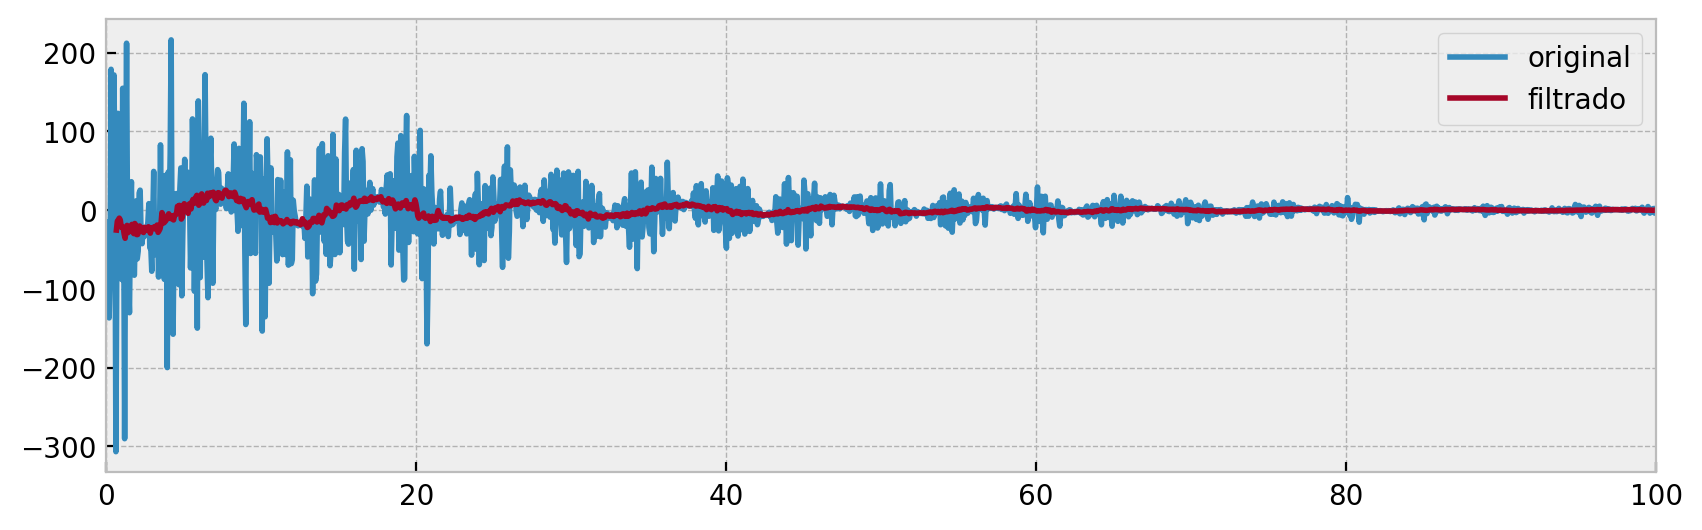

In [19]:
pyplot.figure(figsize=(10, 3))
pyplot.plot(t[1:-1], dAdt, label='original')
pyplot.plot(t_new[1:-1], dAdt_new, label='filtrado')
pyplot.xlim(0, 100)
pyplot.legend()

Como fica evidente acima, o tratamento dos dados pela média móvel produz resultados mais estáveis frente a diferenciação. Além do mais, dados os pequenos intervalos de tempo a derivada dos dados não tratados certamente provê resultados que não são físicos. Como exercício, procure avaliar a média móvel da derivada calculada com os resultados brutos e compare-a graficamente com aquela já apresentada acima com os resultados filtrados.

### Suplemento: funções e ajuste de curvas

Para instigar um pouco seus estudos de Python, vamos aqui entrar em alguns tópicos ainda não abordados e realizar um ajuste de modelo aos dados experimentais tratados anteriormente. 

Um pêndulo amortecido é frequentemente modelado (não vamos entrar em aspectos da mecânica) por uma função trigonométrica limitada por um envelope exponencial decrescente. Considerando que o pêndulo seja abandonado do repouso em seu ponto de energia potencial mais elevada, fica claro por razões físicas que a função trigonométrica a empregar para o comportamento periódico seja o cosseno (que é unitário no instante inicial). Da mesma forma, a função exponencial é unitária em zero, de forma que respeitamos a amplitude máxima inicial $A_{0}$. A frequência angular $k$ é dada por $2\pi T^{-1}$, onde $T$ é o período do pêndulo. Finalmente temos uma constante de amortecimento $\beta$ que representa o inverso da escala de tempo em que o pêndulo se aproxima de 32% de sua amplitude inicial.

$$
A(t) = A_{0} \exp(-\beta t) \cos(k t)
$$

#### Definindo uma função

Até então empregamos funções e classes que providas por alguns pacotes e padrões da linguagem Python. Funções são fundamentais para a realização de tarefas repetitivas, em que devemos realizar muitas vezes a mesma sequência de operações. Esse é o caso, por exemplo, de um ajuste não linear de curvas, em que devemos avaliar a equação muitas vezes com seus parâmetros modificados para minimizar o erro em relação a um objetivo.

Neste tópico desejo não apenas falar sobre os elementos que compõe uma função da ótica de execução, mas também ensinar boas práticas. É importante aprender uma nova linguagem em conjunto com o estilo praticado pelos programadores para que seu código seja inteligível e facilmente adaptável por outros. Para detalhes (que tento no máximo respeitar) acerca de como *um código em Python* deve parecer, recomendo a leitura da [PEP 8](https://www.python.org/dev/peps/pep-0008/).

Uma função é composta basicamente de duas ou três partes:
- sua definição, que é uma linha de código iniciando com a palavra-chave `def` seguida de um espaço, o nome da função, seus argumentos entre parêntesis (o que pode se estender por mais de uma linha) e um fim da definição marcado por dois pontos.
- o corpo da função, em que as instruções de trabalho são executadas. Esta parte é **obrigatoriamente** indentada em relação a declaração, esta é a forma que Python identifica uma *mudança de escopo*. Boa prática requer o uso de quatro espaços em branco para a indentação (cuidado, usar *tabs* pode inserir o caractere invisível `\t` que não é a mesma coisa que quatro espaços e pode tornar um programa inutilizável).
- o retorno (marcado pela palavra-chave `return`), que no caso de funções simples pode conter o corpo da função na mesma linha.

Em alguns casos, uma função pode não ter um retorno, mas falaremos disto em outro momento. Gostaria de adicionar aqui uma quarta parte que julgo fundamental para um aprendizado sólido e que normalmente é ignorada em formações introdutórias: a documentação da função. Python suporta *strings* com múltiplas linhas iniciadas e encerradas por três aspas (sejam simples `'''` ou duplas `"""`, mas sempre no mesmo estilo na abertura e fechamento) e um caso particular dessas *strings* é chamado *docstring*, que tem a finalidade de se descrever uma função e seus argumentos para que essa possa ser mais facilmente utilizada. Uma forma comum de *docstrings* empregadas em aplicações científicas são as [NumPy docstrings](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html), tal como empregada na definição da função do pêndulo amortecido definida abaixo.

In [20]:
def damped_pendulum(t, Ao, k, beta):
    """ Modelo de pêndulo amortecido. 
    
    Parâmetros
    ----------
    t : np.array
        Série temporal para avaliar posição.
    Ao : float
        Posição angular inicial (graus).
    k : float
        Frequência angular (por segundo).
    beta : float
        Coeficiente de armortecimento (por segundo).
        
    Retorna
    -------
    np.array
        Amplitudes correspondentes aos instantes `t`.
    """

    return Ao * np.exp(-beta * t) * np.cos(k * t)

Na função acima identificamos os elementos anteriormente citados, seja uma linha de definição com a lista de argumentos, sua documentação e o corpo e retorno condensados em uma única linha. Como podemos observar, e não é incomum em projetos complexos, a documentação é várias vezes maior que o corpo da função em si, garantindo o bom entendimento pelo usuário das operações realizadas.

Em Python essencialmente todos os símbolos são uma *classe* (assunto que ainda não abordamos além da definição básica) e portanto possuem atributos, em alguns casos apenas os atributos padrão da linguagem. Se uma *docstring* for provida a uma função, você pode acessá-la através do atributo `__doc__`. Remova o comentário abaixo e verifique o formato da documentação de `damped_pendulum`.

In [21]:
# print(damped_pendulum.__doc__)

**Dica**: como uma alternativa a visitar a página da documentação de um módulo a cada vez que necessitar entender os argumentos de uma função, você pode chamar este atributo. Execute os exemplos abaixo que são basicamente equivalentes.

In [22]:
# print(pd.read_csv.__doc__)

In [23]:
# help(pd.read_csv)

#### Ajuste do modelo

Nesta ilustração de ajuste não linear vamos usar mais um pacote da família  SciPy, o seu pacote homônimo `scipy`, cujo módulo `optimize` provê a função `curve_fit` que empregaremos. Essa função aceita diversos argumentos, mas aqui empregaremos apenas os mais básicos. Se sua curiosidade o pedir, verifique a referida documentação!

Também importamos o pacote padrão `warnings` para evitar mensagens de erros associados a aritmética de ponto flutuante durante os ajustes de curva, mas você não precisa *realmente* aprender isso agora, só guarde num cantinho da memória que isso pode ser útil no futuro.

In [24]:
import warnings
from scipy.optimize import curve_fit

A função `curve_fit` toma como primeiro argumento a função a ser ajustada, a qual deve receber como primeiro argumento o vetor (ou matriz, no caso de funções multivariadas) da variável independente, em nosso caso o tempo. Como segundo argumento, `curve_fit` toma o vetor - repito comentário acima - com os valores da variável independente e em seguida o retorno esperado da função. Os argumentos em *excesso* da função a ser ajustada são automaticamente interpretados como *parâmetros de ajuste* que desejamos encontrar.

Tendo em posse os vetores de tempos e amplitudes, realizamos abaixo para os dados filtrados por média móvel o modelo proposto. O retorno de `curve_fit` é composto de uma lista de parâmetros otimizados `popt` e a matriz de covariância associada, `pcov`. Podemos recuperar os parâmetros da função após ajuste como feito na quarta linha abaixo.

**Nota**: observer aqui outro exemplo de indentação para *mudança de escopo*. Os avisos emitidos são ignorados apenas nas linhas de código indentadas. Caso `curve_fit` encontre algo que não está certo fora do bloco, uma mensagem será emitida.

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    popt, pcov = curve_fit(damped_pendulum, t_new, A_new)
    Ao, k, beta = popt

print('Ampliture original   : {:.3f} graus'.format(Ao))
print('Período do pêndulo   : {:.3f} s'.format(2 * np.pi / k))
print('Tempo característico : {:.3f} s'.format(1 / beta))

Ampliture original   : 43.558 graus
Período do pêndulo   : 10.000 s
Tempo característico : 25.987 s


Realizamos a mesma operação com os dados originais antes de proceder a discussão dos valores obtidos.

In [26]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    popt, pcov = curve_fit(damped_pendulum, t, A)
    Ao, k, beta = popt

print('Ampliture original   : {:.3f} graus'.format(Ao))
print('Período do pêndulo   : {:.3f} s'.format(2 * np.pi / k))
print('Tempo característico : {:.3f} s'.format(1 / beta))

Ampliture original   : 45.555 graus
Período do pêndulo   : 9.998 s
Tempo característico : 25.498 s


Como podemos observar, a amplitude $A_{0}$ encontrada com os dados tratados é menor que aquela dos dados brutos. Isso ocorre porque *diluímos* o valor local no primeiro ponto dos dados filtrados com o valor de seus vizinhos, que são de menor valor. O caso limite de uma média móvel (local) seria aquele em que calculássemos a média de todos os pontos, quando deveríamos obter um valos próximo a zero (execute `A.mean()` para conhecer o valor com a contribuição do ruído *experimental*). O valor esperado de $A_{0} = 45^{\circ}$ foi empregado na geração desses dados (obviamente eu não fiz o experimento do pêndulo quando eu posso pedir para o computador fazer para mim).

Em ambos os casos, o período $T=2\pi k^{-1}$ se aproxima razoavelmente bem do valor empregado na simulação, que foi de $10\,s$. Ao criar $\beta$, solicitei que a amplitude máxima fosse de $2\%$ do valor inicial após $10 T$. O bloco abaixo avalia o erro relativo entre `beta` e seu valor teórico utilizado na geração dos dados.

O arquivo empregado para gerar os dados encontra-se <a href="notebooks/data/02-reading-make-data.py" style="color: rgb(255,0,0);">aqui</a>.

In [27]:
T0 = 10
beta0 = -np.log(0.02) / (10 * T0)
err = 100 * abs(beta - beta0) / beta0
print('Erro relativo em beta = {:.2f}%'.format(err))

Erro relativo em beta = 0.25%


Podemos finalmente traçar o gráfico da curva ajustada em conjunto com os dados originais. Inicialmente declaramos as legendas e calculamos ambas a curva ajustada e a *teórica* usada para gerar os dados com perturbações.

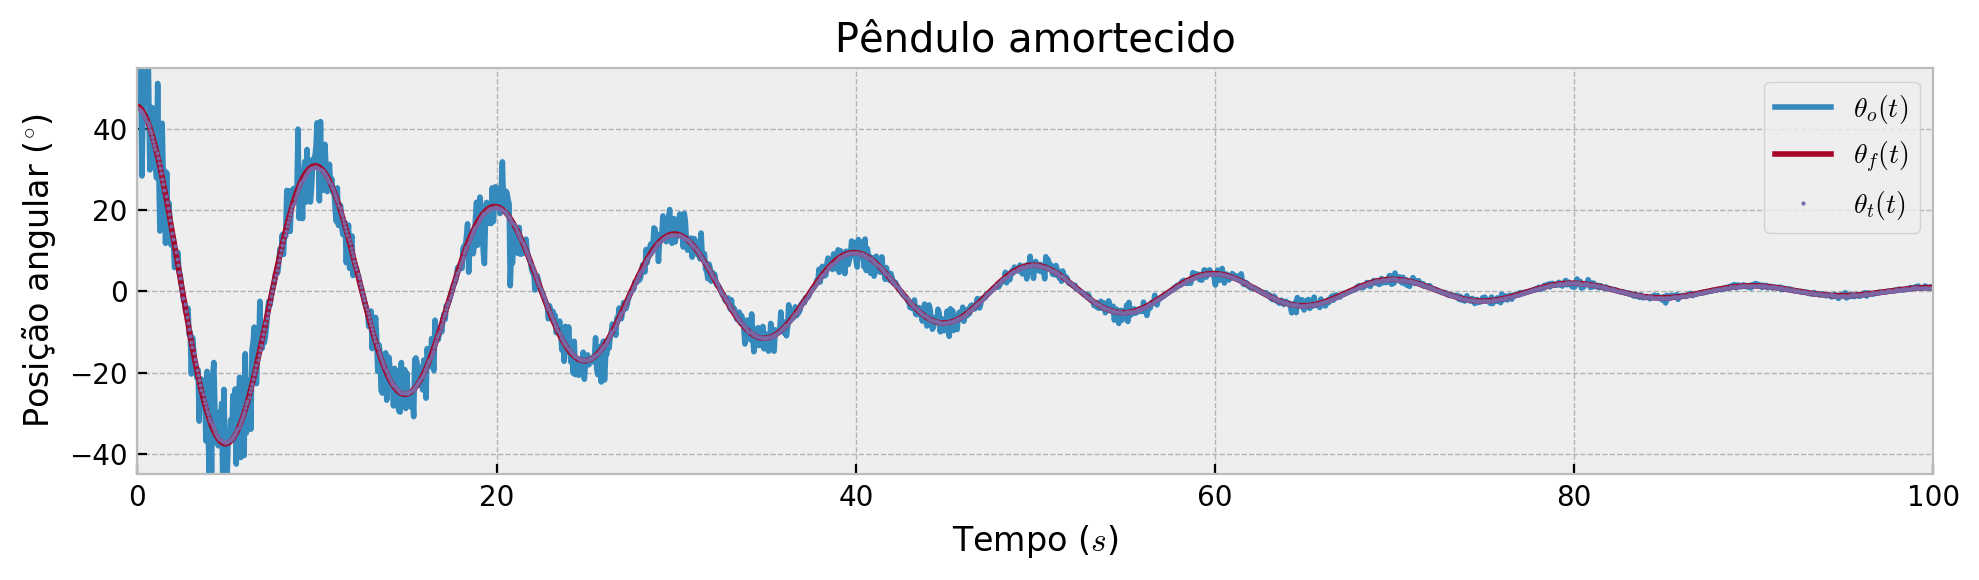

In [28]:
legends = [r'$\theta_{o}(t)$', r'$\theta_{f}(t)$', r'$\theta_{t}(t)$']
A_fitted = damped_pendulum(data.t_sec, *popt)
A_theoric = damped_pendulum(data.t_sec, 45, 2 * np.pi / 10, beta0)

pyplot.close('all')
pyplot.figure(figsize=(10, 3))
pyplot.title('Pêndulo amortecido')
pyplot.plot(data.t_sec, data.A_deg)
pyplot.plot(data.t_sec, A_fitted)
pyplot.plot(data.t_sec, A_theoric, '.', ms=1)
pyplot.xlabel(r'Tempo ($s$)')
pyplot.ylabel(r'Posição angular ($^{\circ}$)')
pyplot.legend(legends, loc='best')
pyplot.xlim(0, 100)
pyplot.ylim(-45, 55)
pyplot.tight_layout()
pyplot.show()

Só para terminar, o erro local absoluto médio pode ser avaliado como se segue. Calculamos os valores relativos para a função ajustada e a função *teórica* usada na geração dos dados. Para gerar o ruído, empreguei uma função normal centrada em zero e com variância 0,25, fazendo que os dados sejam calculados como $A_{real}(t)=A_{ideal}(t) (1 + \varepsilon)$, onde $\varepsilon$ é um número aleatório gerado com as condições descritas. Vemos que os cálculos nos retornam a ordem de grandeza da variância da distribuição usada. Pode se tratar de um gerador de números aleatórios, mesmo para o caso da função exata não era esperado o retorno preciso desta variância.

In [29]:
delta = np.abs(data.A_deg - A_fitted) / np.abs(data.A_deg)
delta.mean()

0.2969200870017757

In [30]:
delta = np.abs(data.A_deg - A_theoric) / np.abs(data.A_deg)
delta.mean()

0.2423528093917231

## Gráficos para artigos científicos

Este tópico pode facilmente se tornar polêmico, portanto neste primeiro momento vou limitar seu escopo. Vamos falar de gráficos para *journals* de ciências físicas inicialmente. Se este não é seu campo de atuação, continue a leitura de qualquer maneira porque há informações úteis no que se segue.

O que buscamos neste tipo de publicação é:
- fácil identificação das curvas com a legenda (os tópicos são geralmente difíceis o suficiente para que perdamos tempo interpretando gráficos).
- um fundo branco para facilitar a impressão e cores que sejam o mais distintas possíves, caso essas sejam permitidas, senão que símbolos possam ser facilmente identificados.

Um exemplo de péssima prática é o uso de losangos e quadrados para representar pontos em um mesmo gráfico, situação que pode ser piorada se adicionarmos triângulos ao grupo: **totalmente ilegível!**.

Outro ponto que devemos tomar cuidado é quanto a unidades e escalas dos eixos: evitar o abuso de escalas logarítmicas quando não for estritamente necessário, especialmente em ambos os eixos simultâneamente.

O uso indevido de unidades que não do sistema internacional ou fortemente difundidas na comunidade (uma ressalva é que, embora em certos meios seja aceito falar em unidades não-SI, não é recomendado seu uso em periódicos científicos, mas totalmente aceitável em revistas técnicas voltadas a indústria, por exemplo) deve ser abolido.

Vamos traduzir nossos valores em radianos antes de prosseguir com a criação do gráfico.

In [31]:
to_rads = np.pi / 180
A_deg_dat = to_rads * data.A_deg
A_deg_mod = to_rads * A_fitted
envelope_u = to_rads * Ao * np.exp(-beta * data.t_sec)

Começamos selecionando o estilo que desejamos e aportando algumas modificações em termos de qualidade gráfica e cores. Sou *defensor* do estilo *bmh*, embora esse empregue uma cor de fundo inadequada para publicações científicas.

Isso pode ser corrigido com algumas modificações no estilo através do *dicionário* (falaremos mais sobre esse tipo de dados) que configura o estilo selecionado acessível através de `pyplot.rcParams`. Mudamos a resolução da imagem para o valor mínimo frequentemente requisitado em periódicos (devemos nos preocupar também com o tamanho final do arquivo e normalmente somos requisitados de fornecer menos de 5 Mb de dados) e as cores de face e eixos.

**Nota**: vários formatos de cor são aceitos por `matplotlib`. Aqui para simplificar estamos usando o formato numérico de escalas de cinza entre zero e um, em que a unidade representa branco e zero preto.

In [32]:
pyplot.style.use('bmh')
pyplot.rcParams['figure.dpi'] = 300
pyplot.rcParams['figure.facecolor'] = '1.0'
pyplot.rcParams['axes.facecolor'] = '1.0'
pyplot.rcParams['axes.edgecolor'] = '0.0'
# TODO mudar cor do texto nos eixos.

In [33]:
# pyplot.rcParams

Finalmente geramos o gráfico. Seguimos a sequência usual e adicionamos uma anotação ao gráfico. Observe que a principal diferença em relação aos gráficos anteriores é o ajuste dos `rcParams` já realizado. Siga os comentários para mais informações.

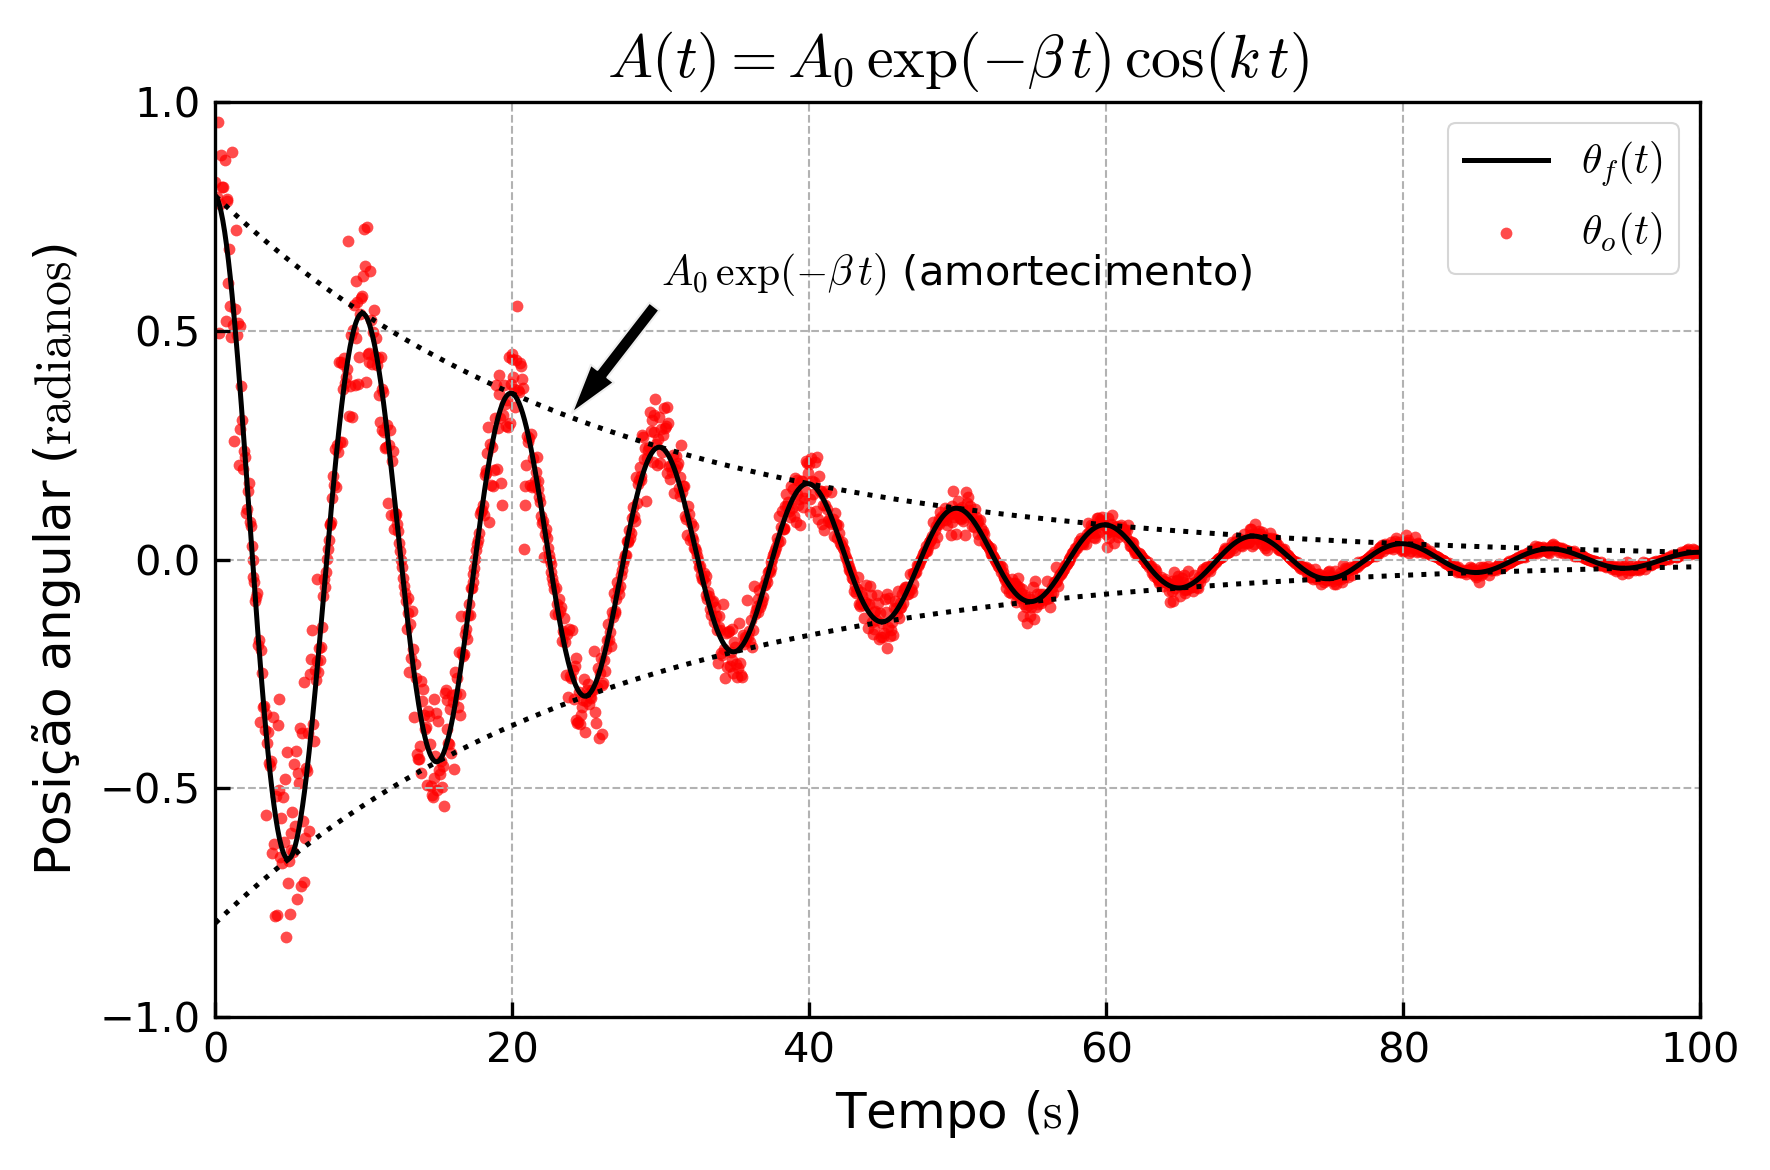

In [34]:
pyplot.close('all')

# Tamanhos em polegadas, a usar conforme o formado requerido
# pelo periódico em questão (2 colunas, preferir figuras quadradas,
# 1 coluna recomenda-se aspecto 16x9).
#pyplot.figure(figsize=(4, 4))

# Usamos o modelo como título da figura: opcional.
pyplot.title(r'$A(t) = A_{0}\,\exp(-\beta\,t)\,\cos(k\,t)$')

# Traçado do modelo em preto, col uma linha de 1.2pt.
pyplot.plot(data.t_sec, A_deg_mod, 
            'k', lw=1.2, 
            label=r'$\theta_{f}(t)$')

# Dados como pontos vermelhos de 8pt sem bordas e 70% opacos.
pyplot.scatter(data.t_sec, A_deg_dat,
               c='r', s=8, lw=0, alpha=0.7, 
               label=r'$\theta_{o}(t)$')

# Adicionamos as funções envelope (+/-) sem legenda.
pyplot.plot(data.t_sec, envelope_u,
            'k:', lw=1.2, label='_nolabel_')
pyplot.plot(data.t_sec, -envelope_u, 
            'k:', lw=1.2, label='_nolabel_')

# Adicionamos uma anotação ao gráfico, ver documentação.
arrowprops = dict(facecolor='black', width=3.0, headwidth=7)
pyplot.annotate(r'$A_{0}\,\exp(-\beta\,t)$ (amortecimento)', 
                xy=(24, 0.32), xytext=(30, 0.6),
                arrowprops=arrowprops)

# Eixos com unidades e legendas.
pyplot.xlabel(r'Tempo ($\mathrm{s}$)')
pyplot.ylabel(r'Posição angular ($\mathrm{radianos}$)')
pyplot.legend(loc=1)
            
# Manualmente dizemos que marcadores usar em y.
pyplot.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
            
# Limitamos as escalas de forma razoável.
pyplot.xlim(0, 100)
pyplot.ylim(-1, 1)
            
# Força a figura a ocupar o máximo da imagem.
pyplot.tight_layout()

# E para encerrar, como prometido, salvamos a figura
# no formato PNG com a resolução adequada.
pyplot.savefig('data/02-graphic.png', dpi=300)

In [35]:
from IPython.core.display import HTML
HTML(open('notebook.css', 'r').read())